<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n20.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.042876,63.787549,74.563365,221.393790,98.459086,122.934704
1,0.0,1.0,42.866604,78.838377,235.791401,367.496383,109.091756,258.404627
2,0.0,2.0,29.388968,67.285527,18.134007,124.808501,109.748284,15.060217
3,0.0,3.0,40.467703,49.928486,-76.967244,23.428944,103.195256,-79.766313
4,0.0,4.0,28.861667,97.588789,184.392654,320.843110,116.661032,204.182078
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.041345,62.402155,179.285017,294.728517,108.629507,186.099010
59996,999.0,56.0,52.385087,58.240880,-255.500595,-134.874628,108.706297,-243.580925
59997,999.0,57.0,48.968014,48.368390,-141.786373,-34.449969,101.107621,-135.557591
59998,999.0,58.0,97.485706,34.702035,155.778224,297.965965,106.782647,191.183318


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.042876,63.787549,74.563365,221.393790,98.459086,122.934704
1,0.0,1.0,42.866604,78.838377,235.791401,367.496383,109.091756,258.404627
2,0.0,2.0,29.388968,67.285527,18.134007,124.808501,109.748284,15.060217
3,0.0,3.0,40.467703,49.928486,-76.967244,23.428944,103.195256,-79.766313
4,0.0,4.0,28.861667,97.588789,184.392654,320.843110,116.661032,204.182078
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.041345,62.402155,179.285017,294.728517,108.629507,186.099010
59996,999.0,56.0,52.385087,58.240880,-255.500595,-134.874628,108.706297,-243.580925
59997,999.0,57.0,48.968014,48.368390,-141.786373,-34.449969,101.107621,-135.557591
59998,999.0,58.0,97.485706,34.702035,155.778224,297.965965,106.782647,191.183318


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.042876  63.787549   74.563365  221.393790   98.459086   
      1.0    42.866604  78.838377  235.791401  367.496383  109.091756   
      2.0    29.388968  67.285527   18.134007  124.808501  109.748284   
      3.0    40.467703  49.928486  -76.967244   23.428944  103.195256   
      4.0    28.861667  97.588789  184.392654  320.843110  116.661032   
...                ...        ...         ...         ...         ...   
999.0 55.0   43.041345  62.402155  179.285017  294.728517  108.629507   
      56.0   52.385087  58.240880 -255.500595 -134.874628  108.706297   
      57.0   48.968014  48.368390 -141.786373  -34.449969  101.107621   
      58.0   97.485706  34.702035  155.778224  297.965965  106.782647   
      59.0   86.220498  39.819351  -92.556004   43.483845  106.756712   

                  e_hat  
rep   index              
0.0   0.0    122.934704  
      1.0    258.404627  
      2.0     15.060217  
      3.0    -79.766313  
      4.0    204.182078  
...                 ...  
999.0 55.0   186.099010  
      56.0  -243.580925  
      57.0  -135.557591  
      58.0   191.183318  
      59.0   -63.272868  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.042876  63.787549   74.563365  221.393790   98.459086   
      1.0    42.866604  78.838377  235.791401  367.496383  109.091756   
      2.0    29.388968  67.285527   18.134007  124.808501  109.748284   
      3.0    40.467703  49.928486  -76.967244   23.428944  103.195256   
      4.0    28.861667  97.588789  184.392654  320.843110  116.661032   
...                ...        ...         ...         ...         ...   
999.0 55.0   43.041345  62.402155  179.285017  294.728517  108.629507   
      56.0   52.385087  58.240880 -255.500595 -134.874628  108.706297   
      57.0   48.968014  48.368390 -141.786373  -34.449969  101.107621   
      58.0   97.485706  34.702035  155.778224  297.965965  106.782647   
      59.0   86.220498  39.819351  -92.556004   43.483845  106.756712   

                  e_hat  
rep   index              
0.0   0.0    122.934704  
      1.0    258.404627  
      2.0     15.060217  
      3.0    -79.766313  
      4.0    204.182078  
...                 ...  
999.0 55.0   186.099010  
      56.0  -243.580925  
      57.0  -135.557591  
      58.0   191.183318  
      59.0   -63.272868  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.042876,63.787549,74.563365,221.393790,98.459086,122.934704
1,0.0,1.0,42.866604,78.838377,235.791401,367.496383,109.091756,258.404627
2,0.0,2.0,29.388968,67.285527,18.134007,124.808501,109.748284,15.060217
3,0.0,3.0,40.467703,49.928486,-76.967244,23.428944,103.195256,-79.766313
4,0.0,4.0,28.861667,97.588789,184.392654,320.843110,116.661032,204.182078
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.041345,62.402155,179.285017,294.728517,108.629507,186.099010
59996,999.0,56.0,52.385087,58.240880,-255.500595,-134.874628,108.706297,-243.580925
59997,999.0,57.0,48.968014,48.368390,-141.786373,-34.449969,101.107621,-135.557591
59998,999.0,58.0,97.485706,34.702035,155.778224,297.965965,106.782647,191.183318


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.042876  63.787549   74.563365  221.393790   98.459086   
      1.0    42.866604  78.838377  235.791401  367.496383  109.091756   
      2.0    29.388968  67.285527   18.134007  124.808501  109.748284   
      3.0    40.467703  49.928486  -76.967244   23.428944  103.195256   
      4.0    28.861667  97.588789  184.392654  320.843110  116.661032   
...                ...        ...         ...         ...         ...   
999.0 55.0   43.041345  62.402155  179.285017  294.728517  108.629507   
      56.0   52.385087  58.240880 -255.500595 -134.874628  108.706297   
      57.0   48.968014  48.368390 -141.786373  -34.449969  101.107621   
      58.0   97.485706  34.702035  155.778224  297.965965  106.782647   
      59.0   86.220498  39.819351  -92.556004   43.483845  106.756712   

                  e_hat  
rep   index              
0.0   0.0    122.934704  
      1.0    258.404627  
      2.0     15.060217  
      3.0    -79.766313  
      4.0    204.182078  
...                 ...  
999.0 55.0   186.099010  
      56.0  -243.580925  
      57.0  -135.557591  
      58.0   191.183318  
      59.0   -63.272868  

[60000 rows x 6 columns]

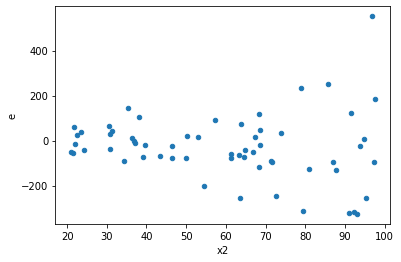

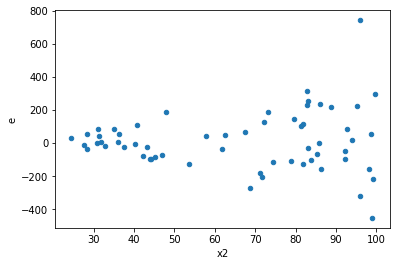

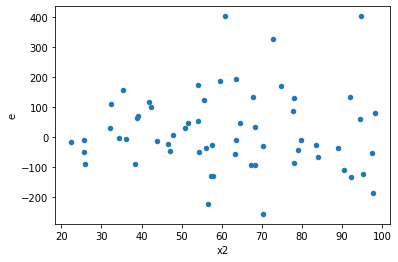

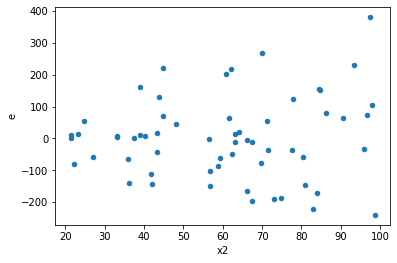

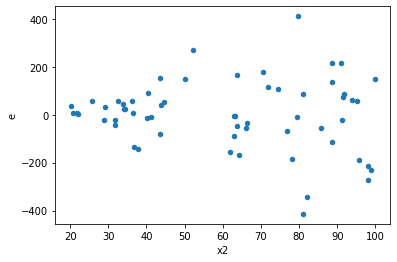

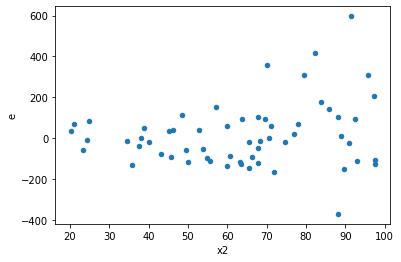

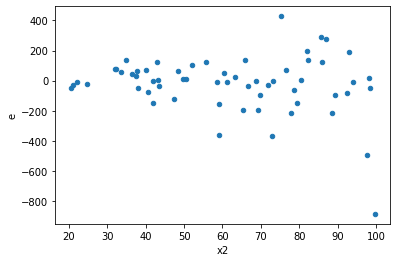

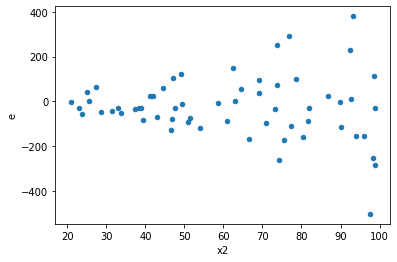

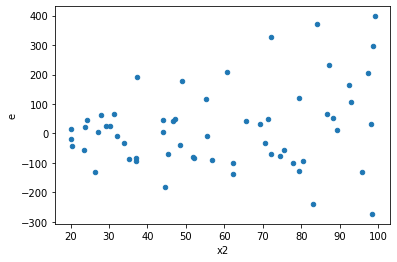

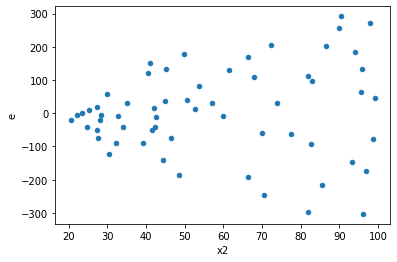

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,81649.48632277522,900716.2986005154,3711.340287398874,40941.64993638706,11.031499880352223,4.185292286074116e-07,0.9999997907353857,2.092646143037058e-07,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,119438.49818561705,1404486.775859858,5429.022644800775,63840.307993629904,11.759079335351087,2.2987510295280345e-07,0.9999998850624485,1.1493755147640172e-07,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,111208.29257795446,395740.1717979345,5054.922389907021,17988.189627178843,3.5585491209707203,0.004322970914110158,0.9978385145429449,0.002161485457055079,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,188345.609369479,586517.7964462013,8561.164062249045,26659.899838463694,3.1140508048458138,0.010212010316476006,0.994893994841762,0.005106005158238003,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,89698.56693819439,839576.3587350505,4077.207588099745,38162.56176068412,9.359975163410912,1.8988707006784011e-06,0.9999990505646497,9.494353503392006e-07,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,135999.00714338684,833328.785179246,6181.773051972129,37878.58114451118,6.127462271107969,7.437471769189408e-05,0.999962812641154,3.718735884594704e-05,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,119927.72586240717,1592823.12021148,5451.260266473053,72401.05091870364,13.28152525829534,7.219226905164078e-08,0.9999999639038655,3.609613452582039e-08,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,81468.85618885631,898978.1966029943,3703.129826766196,40862.64530013611,11.034624010419835,4.174244827570561e-07,0.9999997912877586,2.0871224137852806e-07,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,124400.86811858122,685399.9344495542,5654.5849144809645,31154.542474979735,5.509607326825229,0.00017542407429527174,0.9999122879628524,8.771203714763587e-05,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,81649.48632277522,900716.2986005154,3711.340287398874,40941.64993638706,11.031499880352223,4.185292286074116e-07,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,119438.49818561705,1404486.775859858,5429.022644800775,63840.307993629904,11.759079335351087,2.2987510295280345e-07,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,111208.29257795446,395740.1717979345,5054.922389907021,17988.189627178843,3.5585491209707203,0.004322970914110158,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,188345.609369479,586517.7964462013,8561.164062249045,26659.899838463694,3.1140508048458138,0.010212010316476006,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,89698.56693819439,839576.3587350505,4077.207588099745,38162.56176068412,9.359975163410912,1.8988707006784011e-06,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,135999.00714338684,833328.785179246,6181.773051972129,37878.58114451118,6.127462271107969,7.437471769189408e-05,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,119927.72586240717,1592823.12021148,5451.260266473053,72401.05091870364,13.28152525829534,7.219226905164078e-08,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,81468.85618885631,898978.1966029943,3703.129826766196,40862.64530013611,11.034624010419835,4.174244827570561e-07,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,124400.86811858122,685399.9344495542,5654.5849144809645,31154.542474979735,5.509607326825229,0.00017542407429527174,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    934
Reject001=1 : Homoscedasticity       66
Name: Result_test, dtype: int64